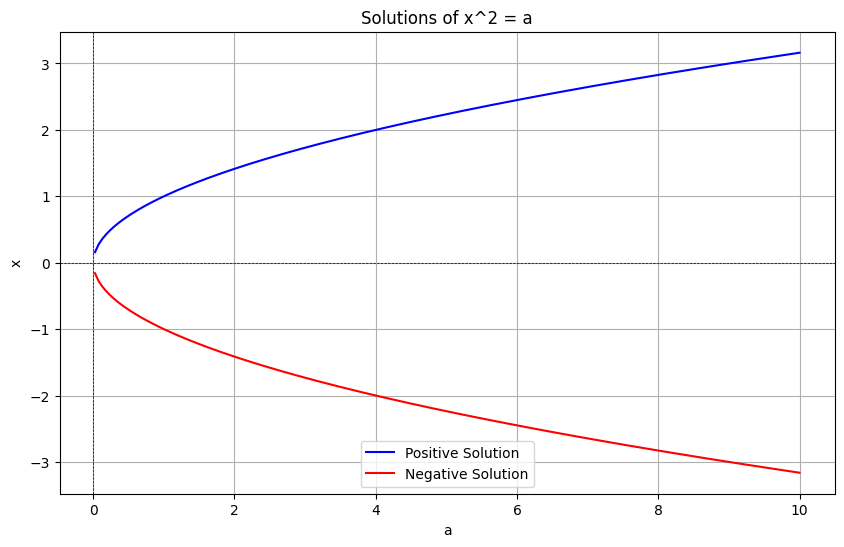

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 변수 선언
x, a = sp.symbols('x a')

# 방정식 정의
equation = x**2 - a

# 특정 a 값에 대한 방정식의 해를 구하는 함수
def solve_equation(a_value):
    eq = equation.subs(a, a_value)
    initial_guess_pos = 1  # 양의 해에 대한 초기 추정값
    initial_guess_neg = -1  # 음의 해에 대한 초기 추정값
    solution_pos = sp.nsolve(eq, x, initial_guess_pos)
    solution_neg = sp.nsolve(eq, x, initial_guess_neg)
    return float(solution_pos), float(solution_neg)

# a 값의 범위를 설정
a_values = np.linspace(-10, 10, 400)
solutions_pos = []
solutions_neg = []

# 각 a 값에 대해 방정식의 해를 구함
for a_value in a_values:
    try:
        sol_pos, sol_neg = solve_equation(a_value)
        solutions_pos.append(sol_pos)
        solutions_neg.append(sol_neg)
    except:
        # nsolve가 실패할 경우 무시하고 넘어감
        solutions_pos.append(np.nan)
        solutions_neg.append(np.nan)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(a_values, solutions_pos, label='Positive Solution', color='blue')
plt.plot(a_values, solutions_neg, label='Negative Solution', color='red')
plt.xlabel('a')
plt.ylabel('x')
plt.title('Solutions of x^2 = a')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

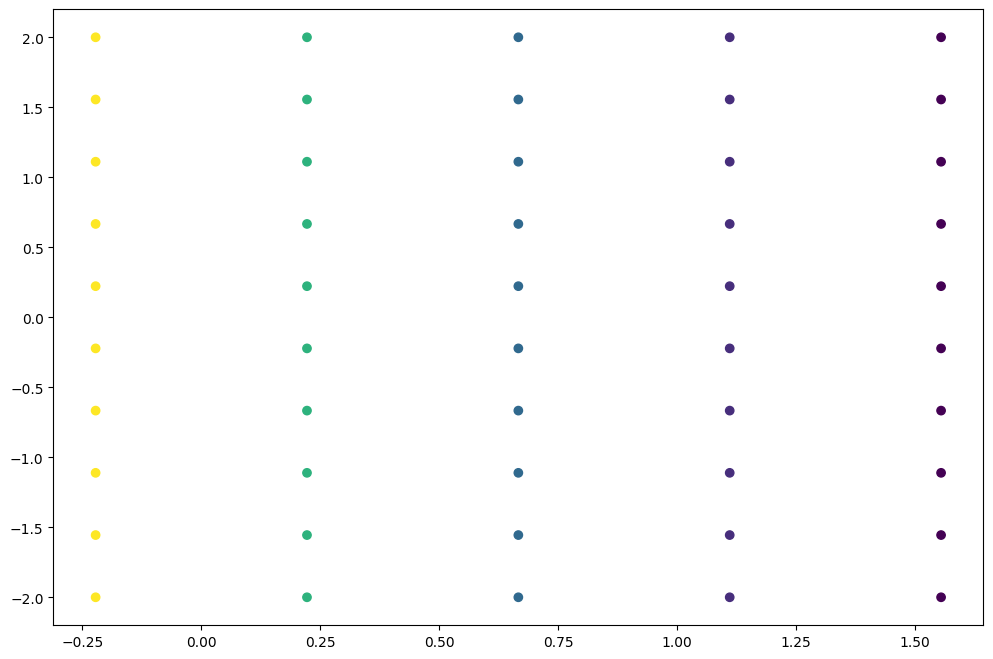

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 변수 선언
phi, alpha, beta = sp.symbols('phi alpha beta')

# 임의의 함수 f(phi, alpha, beta) 정의
f = sp.sin(phi) + alpha * sp.cos(phi) + beta

# 함수의 도함수 df(phi, alpha, beta) 정의
df = sp.diff(f, phi)

# 안정 및 불안정 고정점을 찾는 함수
def find_fixed_points(alpha_value, beta_value):
    # alpha와 beta 값을 대입한 도함수
    df_subs = df.subs({alpha: alpha_value, beta: beta_value})
    
    # 고정점을 찾기 위해 도함수가 0이 되는 값을 풀이
    fixed_points = sp.solveset(df_subs, phi, domain=sp.Interval(0, sp.pi))
    
    stable_points = []
    unstable_points = []
    
    for point in fixed_points:
        # 고정점 근처에서 도함수의 부호를 검사
        df_minus_eps = df_subs.subs(phi, point - 1e-5)
        df_plus_eps = df_subs.subs(phi, point + 1e-5)
        
        if df_minus_eps > 0 and df_plus_eps < 0:
            stable_points.append(point.evalf())
        elif df_minus_eps < 0 and df_plus_eps > 0:
            unstable_points.append(point.evalf())
    
    return stable_points, unstable_points

# 파라미터 범위 설정
alpha_values = np.linspace(-2, 2, 10)
beta_values = np.linspace(-2, 2, 10)

# Phase diagram을 위한 데이터 저장
stable_phi = []
unstable_phi = []

# 각 alpha, beta 값에 대해 고정점을 찾음
for alpha_value in alpha_values:
    for beta_value in beta_values:
        stable_points, unstable_points = find_fixed_points(alpha_value, beta_value)
        
        for point in stable_points:
            stable_phi.append((alpha_value, beta_value, point))
        
        for point in unstable_points:
            unstable_phi.append((alpha_value, beta_value, point))

# 안정 고정점 시각화
stable_phi = np.array(stable_phi)
unstable_phi = np.array(unstable_phi)

plt.figure(figsize=(12, 8))
plt.scatter(stable_phi[:, 0], stable_phi[:, 1], c=stable_phi[:, 2], cmap='viridis', label='Stable Fixed Points', marker='o')
plt.scatter(unstable_phi[:, 0], unstable_phi[:, 1], c=unstable_phi[:, 2], cmap='plasma', label='Unstable Fixed Points', marker='x')
plt.colorbar(label='phi')
plt.xlabel('alpha')
plt.ylabel('beta')
plt.title('Phase Diagram')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def f(phi,alpha,beta):
    -(2*beta**2*(beta**2*((2*cos(phi)**2 - 1)*cos(alpha) + 2*sin(alpha)*sin(phi)*cos(phi)) - cos(alpha))*sin(phi)*cos(phi) + (beta**4*(2*sin(alpha)*cos(alpha) - 8*sin(phi)**3*cos(phi) + 4*sin(phi)*cos(phi)) - 2*sin(alpha)*cos(alpha))*cos(alpha))